### Problem Statement: To successfully an Image in a category based on the user input

##### We will be using TensorFlow and Keras to classify images

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import load_img

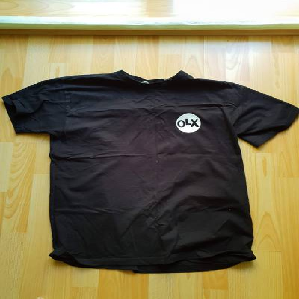

In [62]:
path = 'clothing-dataset/train/t-shirt/'
name = '5f0a3fa0-6a3d-4b68-b213-72766a643de7.jpg'
full_img = f'{path}/{name}'
img = load_img(full_img, target_size=(299, 299))
img

In [36]:
x = np.array(img)
x

array([[[179, 171,  99],
        [179, 171,  99],
        [181, 173, 101],
        ...,
        [251, 253, 248],
        [251, 253, 248],
        [251, 254, 247]],

       [[188, 179, 112],
        [187, 178, 111],
        [186, 177, 108],
        ...,
        [251, 252, 247],
        [251, 252, 247],
        [251, 252, 246]],

       [[199, 189, 127],
        [200, 190, 128],
        [200, 191, 126],
        ...,
        [250, 251, 245],
        [250, 251, 245],
        [250, 251, 245]],

       ...,

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [183, 135,  25],
        [181, 133,  22],
        [183, 135,  24]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [182, 134,  23],
        [180, 132,  21],
        [182, 134,  23]],

       [[165, 151,  76],
        [173, 159,  84],
        [171, 157,  82],
        ...,
        [181, 133,  22],
        [179, 131,  20],
        [182, 134,  23]]

In [37]:
x.shape

(299, 299, 3)

#####  299 x 299 represent the image size
##### 3 indicates the Red, Green, Blue channels

#### Pre-Trained Convolutional Neural Networks

In [38]:
#import pre-trained model Xception 
from keras.applications.xception import Xception

#import preprocess_input to process the input 
from keras.applications.xception import preprocess_input

#import decode_predictions to decode output  
from keras.applications.xception import decode_predictions

In [39]:
model = Xception(weights='imagenet', input_shape=(299, 299, 3))

In [40]:
X = np.array([x])

In [41]:
X.shape

(1, 299, 299, 3)

In [42]:
#turns the result into values between -1 to 1 from 0-255 
X = preprocess_input(X)

In [43]:
pred = model.predict(X)
pred

1/1 [==============================] - 1s 1s/step


array([[3.23712011e-04, 1.57383678e-04, 2.13493011e-04, 1.52370354e-04,
        2.47626129e-04, 3.05035705e-04, 3.20591964e-04, 1.47499159e-04,
        2.03621647e-04, 1.49272280e-04, 1.95662898e-04, 2.10137194e-04,
        7.59264221e-05, 1.13972113e-04, 1.62683384e-04, 2.04638432e-04,
        1.97415953e-04, 1.44288730e-04, 1.40217366e-04, 1.73685796e-04,
        7.46689562e-04, 2.56966538e-04, 2.66808463e-04, 2.96514074e-04,
        3.73602117e-04, 2.77404091e-04, 2.16570857e-04, 2.27269935e-04,
        3.80812766e-04, 1.72165790e-04, 3.05400725e-04, 1.96431123e-04,
        3.92114802e-04, 4.78071190e-04, 2.91751174e-04, 3.25693196e-04,
        1.47395098e-04, 1.62361917e-04, 2.12710569e-04, 1.34028131e-04,
        2.40070280e-04, 6.75211195e-04, 2.54943239e-04, 1.44478618e-04,
        4.12820751e-04, 2.04408454e-04, 3.02957895e-04, 1.49339481e-04,
        1.99653528e-04, 2.27005643e-04, 2.93728983e-04, 2.27444485e-04,
        6.37644145e-04, 7.82615039e-04, 2.49557197e-04, 4.052702

In [44]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.68196326),
  ('n02916936', 'bulletproof_vest', 0.038140047),
  ('n04370456', 'sweatshirt', 0.034324735),
  ('n03710637', 'maillot', 0.011354213),
  ('n04525038', 'velvet', 0.001845359)]]

#### Insight: The pretrained model (Xception) doesn't identify as well as we want it to.

#### Convolutional Neural Networks (CNN)
##### CNN's convert images into vector representations, which inturn are used in Dense Layers to make predictions

### Transfer Learning
###### Reading Data with ImageGenerator
###### Train Xception on smaller images

In [45]:
#import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator

In [63]:
#for training dataset 
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
train_ds= train_gen.flow_from_directory(
    'clothing-dataset/train',
    class_mode='categorical',
     target_size=(150,150),
    batch_size=32
)

Found 3068 images belonging to 10 classes.


In [64]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [54]:
# next() python function loops through train_ds and stores the values in X and y 
X,y = next(train_ds)

In [55]:
X[:5]

array([[[[ 0.2941177 ,  0.26274514,  0.17647064],
         [ 0.30196083,  0.27058828,  0.18431377],
         [ 0.30980396,  0.27843142,  0.19215691],
         ...,
         [ 0.41176474,  0.41176474,  0.3176471 ],
         [ 0.4039216 ,  0.4039216 ,  0.30980396],
         [ 0.39607847,  0.39607847,  0.30196083]],

        [[ 0.32549024,  0.2941177 ,  0.20784318],
         [ 0.33333337,  0.30196083,  0.21568632],
         [ 0.3411765 ,  0.30980396,  0.22352946],
         ...,
         [ 0.41176474,  0.41176474,  0.3176471 ],
         [ 0.4039216 ,  0.4039216 ,  0.30980396],
         [ 0.39607847,  0.39607847,  0.30196083]],

        [[ 0.32549024,  0.2941177 ,  0.20784318],
         [ 0.3803922 ,  0.34901965,  0.26274514],
         [ 0.38823533,  0.35686278,  0.27058828],
         ...,
         [ 0.41960788,  0.41960788,  0.32549024],
         [ 0.41960788,  0.41960788,  0.32549024],
         [ 0.4039216 ,  0.4039216 ,  0.30980396]],

        ...,

        [[-0.2862745 , -0.2862745 , -0

In [57]:
X.shape

(32, 150, 150, 3)

In [58]:
y.shape

(32, 10)

In [65]:
#for validation dataset 
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds=val_gen.flow_from_directory(
    'clothing-dataset/validation',
    class_mode='categorical',
     target_size=(150,150),
    batch_size=32,
    shuffle=False
)

Found 341 images belonging to 10 classes.


In [67]:
#create base model
#include_top=False => means that the pre-trained Dense Layer will be left out and we can use our custom Dense Layer
#Top-layer in CNN = Dense Layer + Prediction
#bottom-layer in CNN = Input Image + Convolutional Layers

base_model = Xception(
    weights='imagenet',
    include_top=False, 
    input_shape=(150,150,3)
)

#he weights of the convolutional layer(s) will not be updated (will be freezed)
base_model.trainable = False

83683744/83683744 [==============================] - 18s 0us/step


In [82]:
# input images 
inputs = keras.Input(shape=(150,150, 3))

# input image is turned into 3D vector 
base = base_model(inputs)

#the 3d vector will be turned into 1D vector representation
vectors = keras.layers.GlobalAveragePooling2D()(base)

# use Dense Layers to make predictions
outputs = keras.layers.Dense(10)(vectors)

# feed both the input images and vec_reps to keras model for training
model = keras.Model(inputs, outputs)

In [83]:
# make a prediction for our training  
pred = model.predict(X)

1/1 [==============================] - 2s 2s/step


In [84]:
pred.shape

(32, 10)

In [85]:
pred[0]

array([ 0.41029838, -0.37426716, -0.6128288 ,  0.20754322,  0.92609656,
        0.35011762,  0.57487154, -0.24616602,  1.023729  ,  0.3092256 ],
      dtype=float32)

In [87]:
#train the model 
# first we need optimizers

learning_rate = 0.01
optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

# CategoricalCrossEntropy measures the accuracy of multiclass classification
loss = keras.losses.CategoricalCrossentropy(from_logits=True)

In [88]:
model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [90]:
history= model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 108s 1s/step - loss: 0.1573 - accuracy: 0.9426 - val_loss: 1.0537 - val_accuracy: 0.7771
Epoch 2/10
96/96 [==============================] - 109s 1s/step - loss: 0.1127 - accuracy: 0.9583 - val_loss: 0.8917 - val_accuracy: 0.8182
Epoch 3/10
82/96 [========================>.....] - ETA: 14s - loss: 0.0897 - accuracy: 0.9702

KeyboardInterrupt: 

In [ ]:
history.history['accuracy']
history.history['val_accuracy']

### Adjusting the learning rate